# Statistical Analysis of Time Series

Lesson outline
Pandas makes it very convenient to compute various statistics on a dataframe:

Global statistics: mean, median, std, sum, etc. [more]
Rolling statistics: rolling_mean, rolling_std, etc. [more]
You will use these functions to analyze stock movement over time.

Specifically, you will compute:

Bollinger Bands: A way of quantifying how far stock price has deviated from some norm.
Daily returns: Day-to-day change in stock price.

In [2]:
import pandas as pd


def test_run():
    """Function called by Test Run."""
    df = pd.read_csv("data/AAPL.csv")
    
    # TODO: Print last 5 rows of the data frame
    print(df.tail())


if __name__ == "__main__":
    test_run()


            Date    Open    High     Low   Close   Volume  Adj Close
3170  2000-02-07  142.56  142.78  141.44  142.38  5845800     114.65
3171  2000-02-04  143.19  144.00  142.13  142.59  4925400     114.82
3172  2000-02-03  140.88  143.25  140.00  143.19  7997500     115.30
3173  2000-02-02  141.28  142.25  140.38  141.06  6205900     113.58
3174  2000-02-01  139.75  141.69  138.53  140.94  8419900     113.49


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    print('Symbol:{}'.format(symbol))
    
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    print('FULL LIST OF SYMBOLS {}\n\n'.format(symbols))
        
    for symbol in symbols:
        print('Name of file path: {}\n'.format(symbol_to_path(symbol)))
        
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

if __name__ == "__main__":
    symbol = ['SPY']
    dates = pd.date_range('2012-01-01', '2012-12-31')
    
    df = get_data(symbol, dates)
    
    print(df.head())

FULL LIST OF SYMBOLS ['SPY']


Symbol:SPY
Name of file path: data\SPY.csv

Symbol:SPY
               SPY
2012-01-03  126.29
2012-01-04  126.49
2012-01-05  126.82
2012-01-06  126.50
2012-01-09  126.80


<class 'pandas.core.series.Series'>


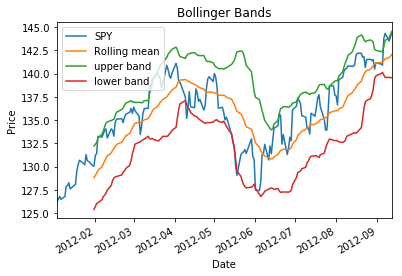

In [37]:
"""Bollinger Bands."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size.
    
    deprecated, replace with: Series.rolling(window=20,center=False).mean()
    """
    #return Series.rolling(window=20,center=False).mean()
    
    m = values.rolling(window=window).mean()
    
    return m


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size.
    
       values:
           values: series: prices of the symbol
           
        return:
            rstd: rolling standard deviation
    """
    # TODO: Compute and return rolling standard deviation
    rstd = values.rolling(window=window).std()
    
    return rstd
    


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands.
       
       values:
           rm: rolling mean
           rstd: rolling standard deviation
       
    """
    # TODO: Compute upper_band and lower_band
    upper_band = rm + (2 * rstd)
    lower_band = rm - (2 * rstd)
    
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    
    print(type(df['SPY']))

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    test_run()


In [35]:
help(pd.Series.rolling)

Help on function rolling in module pandas.core.generic:

rolling(self, window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
    Provides rolling window calculations.
    
    .. versionadded:: 0.18.0
    
    Parameters
    ----------
    window : int, or offset
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes. This is
        new in 0.19.0
    min_periods : int, default None
        Minimum number of observations in window required to have a value
        (otherwise result is NA). For a window that is specified by an offset,
        `min_periods` will default to 1. Otherwise, `min_periods` will default
        to the size of the

# Daily Returns

Daily return = (today_price/yesterday_price) - 1

daily_return = (price[t]/price[t-1]) - 1

In [41]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df
    
def get_all_data(symbols):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    
    for symbol in symbols:
        # get path
        filePath = os.path.join('data', "{}.csv".format(str(symbol)))
        
        # open file
        with open(filePath, 'r') as fh:
            print(fh.readall())
        
    

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows


def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

def getXOMdata():
    '''
    Just for XOM
    '''
    # get XOM data
    symbols = ['XOM']
    
    get_all_data(symbols)

if __name__ == "__main__":
   
    getXOMdata()
    


FileNotFoundError: [Errno 2] No such file or directory: 'data\\XOM.csv'

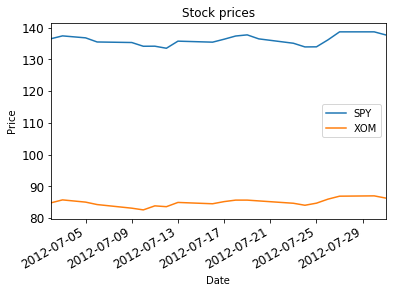

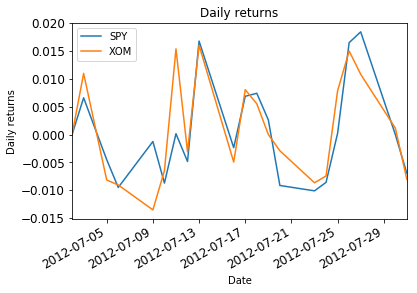

In [56]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns_complicated(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    
    daily_returns = df.copy()    
    daily_returns[1:] = (df[1:]/df[:-1].values) - 1
    daily_returns.iloc[0,:] = 0
    
    
    return daily_returns

def compute_daily_returns_easier(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    
    daily_returns = (df/df.shift(1)) - 1
    
    daily_returns.iloc[0,:] = 0
    
    
    return daily_returns


def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns complicated way
    daily_returns_complicated = compute_daily_returns_complicated(df)
    
    # compute daily returns easy way
    daily_returns_easier = compute_daily_returns_easier(df)
    
    plot_data(daily_returns_easier, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()


# Cumulative Returns